<img src="./images/banner.png" width="800">

# Case Studies and Applications in Linear Regression

Linear regression, despite its simplicity, is a powerful tool with a wide range of real-world applications. In this lecture, we'll explore how the concepts and algorithms we've learned can be applied to solve practical problems across various domains.


Linear regression's strength lies in its ability to model relationships between variables and make predictions. This makes it applicable in numerous fields:

1. **Economics and Finance**: Predicting stock prices, analyzing economic indicators, or estimating property values.
2. **Healthcare**: Studying the relationship between lifestyle factors and health outcomes, or predicting patient recovery times.
3. **Marketing**: Analyzing the impact of advertising spend on sales, or predicting customer lifetime value.
4. **Environmental Science**: Modeling climate change effects, or predicting crop yields based on environmental factors.
5. **Social Sciences**: Investigating relationships between social factors and outcomes like education or income.


While more complex models exist, linear regression often serves as a baseline model or a component in more sophisticated analyses.


As we move from theoretical understanding to practical application, several considerations come into play:

1. **Data Preparation**: Real-world data is often messy. We'll need to handle missing values, outliers, and perform appropriate scaling.

2. **Feature Engineering**: Creating meaningful features from raw data is crucial for model performance.

3. **Model Selection**: Choosing between simple linear regression, multiple regression, or polynomial regression based on the nature of the data.

4. **Regularization**: Applying techniques like Ridge or Lasso regression to prevent overfitting in high-dimensional datasets.

5. **Evaluation in Context**: Interpreting metrics like MSE or R-squared in the context of the specific problem and domain.


💡 **Pro Tip:** Always start with exploratory data analysis (EDA) to understand your data before applying any regression techniques.


Throughout this course, we've developed custom implementations of various regression algorithms:


```python
def mini_batch_gradient_descent(X, y, learning_rate=0.01, num_epoch=1000, batch_size=20):
    # Implementation details...

def fit_polynomial_regression(X, y, degree):
    # Implementation details...

def mini_batch_gradient_descent_with_ridge(X, y, learning_rate=0.01, num_epoch=1000, batch_size=20, lambda_reg=0.1):
    # Implementation details...

def mini_batch_gradient_descent_with_lasso(X, y, learning_rate=0.01, num_epoch=1000, batch_size=20, lambda_reg=0.1):
    # Implementation details...
```


These custom implementations provide us with flexibility and a deep understanding of the underlying algorithms. We'll use these in our case studies, comparing their performance and usability to established libraries like scikit-learn.


As we dive into case studies, we'll encounter common challenges in applying linear regression to real-world problems:

1. **Non-linear Relationships**: Many real-world relationships are not strictly linear. We'll explore how to handle these cases.
2. **Multicollinearity**: Dealing with highly correlated features in multiple regression scenarios.
3. **Heteroscedasticity**: Addressing cases where the variance of errors is not constant across all levels of the independent variables.
4. **Limited Data**: Strategies for working with small datasets or handling imbalanced data.


> **Important Note:** Real-world application often requires iterative refinement of models and careful interpretation of results.


In the upcoming sections, we'll dive into specific case studies that demonstrate the application of linear regression in diverse fields. We'll walk through the entire process from data preparation to model evaluation and interpretation of results.


Understanding how to apply linear regression to real-world problems is crucial for data scientists and analysts. It forms the foundation for more advanced modeling techniques and provides valuable insights in many decision-making processes.


By the end of this lecture, you'll have a comprehensive understanding of how to take the theoretical knowledge of linear regression and apply it to solve practical, real-world problems across various domains.

**Table of contents**<a id='toc0_'></a>    
- [Case Study: Tips Dataset Analysis](#toc1_)    
  - [Loading and Exploring the Data](#toc1_1_)    
  - [Data Preprocessing](#toc1_2_)    
  - [Splitting the Data](#toc1_3_)    
  - [Model Implementation and Evaluation](#toc1_4_)    
  - [Visualizing Results](#toc1_5_)    
  - [Interpretation and Insights](#toc1_6_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_'></a>[Case Study: Tips Dataset Analysis](#toc0_)

In this section, we'll analyze the Tips dataset from seaborn, demonstrating the application of various regression techniques we've learned. We'll go through the entire process from data loading to model evaluation.


### <a id='toc1_1_'></a>[Loading and Exploring the Data](#toc0_)


First, let's load the dataset and take a look at its structure.


In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

np.random.seed(42)

In [2]:
# Load the dataset
tips_df = sns.load_dataset('tips')
tips_df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [3]:
# Display basic information
tips_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [4]:
tips_df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [5]:
# Check for missing values
tips_df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

### <a id='toc1_2_'></a>[Data Preprocessing](#toc0_)


Now, let's preprocess the data, including handling categorical variables and scaling numerical features.


In [6]:
tips_df['sex'] = tips_df.sex.cat.codes
tips_df['smoker'] = tips_df.smoker.cat.codes
tips_df['time'] = tips_df.time.cat.codes

In [7]:
# get dummies for day using pd.get_dummies
tips_df_encoded = pd.get_dummies(tips_df, columns=['day'])
tips_df_encoded.head()

,total_bill,tip,sex,smoker,time,size,day_Thur,day_Fri,day_Sat,day_Sun
0,16.99,1.01,1,1,1,2,False,False,False,True
1,10.34,1.66,0,1,1,3,False,False,False,True
2,21.01,3.50,0,1,1,3,False,False,False,True
3,23.68,3.31,0,1,1,2,False,False,False,True
4,24.59,3.61,1,1,1,4,False,False,False,True


In [8]:
# Select features and target
X = tips_df_encoded.drop('tip', axis=1)
y = tips_df_encoded['tip']

In [9]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
# Convert to DataFrame to keep column names
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [11]:
X_scaled

,total_bill,sex,smoker,time,size,day_Thur,day_Fri,day_Sat,day_Sun
0,-0.314711,1.343353,0.784789,0.621582,-0.600193,-0.583660,-0.290593,-0.744406,1.486784
1,-1.063235,-0.744406,0.784789,0.621582,0.453383,-0.583660,-0.290593,-0.744406,1.486784
2,0.137780,-0.744406,0.784789,0.621582,0.453383,-0.583660,-0.290593,-0.744406,1.486784
3,0.438315,-0.744406,0.784789,0.621582,-0.600193,-0.583660,-0.290593,-0.744406,1.486784
4,0.540745,1.343353,0.784789,0.621582,1.506958,-0.583660,-0.290593,-0.744406,1.486784
...,...,...,...,...,...,...,...,...,...
239,1.040511,-0.744406,0.784789,0.621582,0.453383,-0.583660,-0.290593,1.343353,-0.672593
240,0.832275,1.343353,-1.274228,0.621582,-0.600193,-0.583660,-0.290593,1.343353,-0.672593
241,0.324630,-0.744406,-1.274228,0.621582,-0.600193,-0.583660,-0.290593,1.343353,-0.672593
242,-0.221287,-0.744406,0.784789,0.621582,-0.600193,-0.583660,-0.290593,1.343353,-0.672593


### <a id='toc1_3_'></a>[Splitting the Data](#toc0_)


Let's split our data into training and testing sets.


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [13]:
X_train

,total_bill,sex,smoker,time,size,day_Thur,day_Fri,day_Sat,day_Sun
228,-0.732309,-0.744406,0.784789,0.621582,-0.600193,-0.583660,-0.290593,1.343353,-0.672593
208,0.504726,-0.744406,-1.274228,0.621582,-0.600193,-0.583660,-0.290593,1.343353,-0.672593
96,0.843531,-0.744406,-1.274228,0.621582,-0.600193,-0.583660,3.441236,-0.744406,-0.672593
167,1.342172,-0.744406,0.784789,0.621582,1.506958,-0.583660,-0.290593,-0.744406,1.486784
84,-0.428397,-0.744406,0.784789,-1.608799,-0.600193,1.713325,-0.290593,-0.744406,-0.672593
...,...,...,...,...,...,...,...,...,...
106,0.079249,-0.744406,-1.274228,0.621582,-0.600193,-0.583660,-0.290593,1.343353,-0.672593
14,-0.557841,1.343353,0.784789,0.621582,-0.600193,-0.583660,-0.290593,-0.744406,1.486784
92,-1.579886,1.343353,-1.274228,0.621582,-0.600193,-0.583660,3.441236,-0.744406,-0.672593
179,1.670847,-0.744406,-1.274228,0.621582,-0.600193,-0.583660,-0.290593,-0.744406,1.486784


In [14]:
y_train

228    2.72
208    2.03
96     4.00
167    4.50
84     2.03
       ... 
106    4.06
14     3.02
92     1.00
179    3.55
102    2.50
Name: tip, Length: 195, dtype: float64

### <a id='toc1_4_'></a>[Model Implementation and Evaluation](#toc0_)


Now, we'll implement and evaluate different regression models using our custom implementations.


In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"{model_name} Evaluation:")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"R-squared: {r2:.4f}\n")

# Helper function to add bias term
def add_bias(X):
    return np.c_[np.ones((X.shape[0], 1)), X]

1. **Linear Regression**


In [16]:
def compute_cost(X, y, beta):
    n = len(y)
    predictions = X.dot(beta)
    cost = (1/(2*n)) * np.sum((predictions - y)**2)
    return cost

def compute_gradient(X, y, beta):
    n = len(y)
    predictions = X.dot(beta)
    gradient = (1/n) * X.T.dot(predictions - y)
    return gradient

def mini_batch_gradient_descent(X, y, learning_rate=0.01, num_epoch=1000, batch_size=20):
    n, m = X.shape
    beta = np.random.randn(m, 1)
    cost_history = []

    for _ in range(num_epoch):
        shuffled_indices = np.random.permutation(n)
        X_shuffled = X[shuffled_indices]
        y_shuffled = y[shuffled_indices]

        for i in range(0, n, batch_size):
            xi = X_shuffled[i:i+batch_size]
            yi = y_shuffled[i:i+batch_size]
            gradient = compute_gradient(xi, yi, beta)
            beta -= learning_rate * gradient

        cost = compute_cost(X, y, beta)
        cost_history.append(cost)

    return beta, cost_history

In [17]:
X_train_bias = add_bias(X_train)
X_test_bias = add_bias(X_test)

beta_lr, _ = mini_batch_gradient_descent(X_train_bias, y_train.values.reshape(-1, 1))
y_pred_lr = X_test_bias.dot(beta_lr)

print("Test data:")
evaluate_model(y_test, y_pred_lr, "Linear Regression")

Test data:
Linear Regression Evaluation:
MSE: 0.7042
RMSE: 0.8392
MAE: 0.6676
R-squared: 0.4366



In [18]:
print("Training data:")
evaluate_model(y_train, X_train_bias.dot(beta_lr), "Linear Regression")

Training data:
Linear Regression Evaluation:
MSE: 1.1007
RMSE: 1.0492
MAE: 0.7595
R-squared: 0.4582



<Axes: >

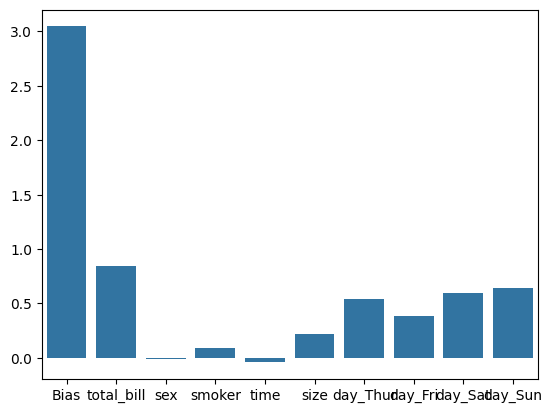

In [19]:
sns.barplot(x=['Bias'] + X_train.columns.tolist(), y=beta_lr.flatten())

2. **Ridge Regression (L2)**


In [20]:
def mini_batch_gradient_descent_with_ridge(X, y, learning_rate=0.01, num_epoch=1000, batch_size=20, lambda_reg=0.1):
    n, m = X.shape
    beta = np.random.randn(m, 1)
    cost_history = []

    for _ in range(num_epoch):
        shuffled_indices = np.random.permutation(n)
        X_shuffled = X[shuffled_indices]
        y_shuffled = y[shuffled_indices]

        for i in range(0, n, batch_size):
            xi = X_shuffled[i:i+batch_size]
            yi = y_shuffled[i:i+batch_size]
            gradient = compute_gradient_with_ridge(xi, yi, beta, lambda_reg)
            beta -= learning_rate * gradient

        cost = compute_cost_with_ridge(X, y, beta, lambda_reg)
        cost_history.append(cost)

    return beta, cost_history

def compute_gradient_with_ridge(X, y, beta, lambda_reg):
    m = X.shape[0]
    predictions = X.dot(beta)
    gradient = (1/m) * X.T.dot(predictions - y) + (lambda_reg/m) * beta
    return gradient

def compute_cost_with_ridge(X, y, beta, lambda_reg):
    m = X.shape[0]
    predictions = X.dot(beta)
    cost = (1/(2*m)) * np.sum((predictions - y)**2) + (lambda_reg/(2*m)) * np.sum(beta**2)
    return cost

In [21]:
beta_ridge, _ = mini_batch_gradient_descent_with_ridge(X_train_bias, y_train.values.reshape(-1, 1), lambda_reg=0.5)
y_pred_ridge = X_test_bias.dot(beta_ridge)

evaluate_model(y_test, y_pred_ridge, "Ridge Regression")

Ridge Regression Evaluation:
MSE: 0.6710
RMSE: 0.8192
MAE: 0.6529
R-squared: 0.4632



In [22]:
evaluate_model(y_train, X_train_bias.dot(beta_ridge), "Ridge Regression")

Ridge Regression Evaluation:
MSE: 1.1064
RMSE: 1.0519
MAE: 0.7549
R-squared: 0.4554



<Axes: >

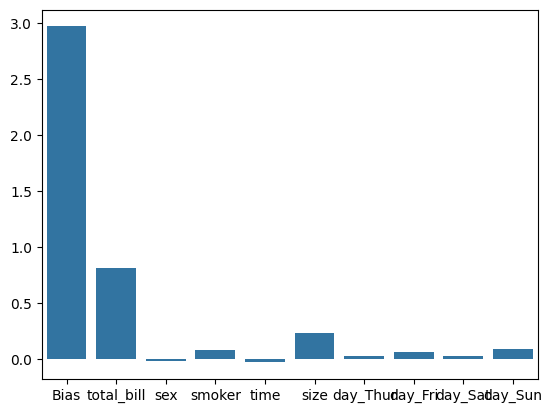

In [23]:
sns.barplot(x=['Bias'] + X_train.columns.tolist(), y=beta_ridge.flatten())

4. **Lasso Regression (L1)**


In [24]:
import numpy as np

def mini_batch_gradient_descent_with_lasso(X, y, learning_rate=0.01, num_epoch=1000, batch_size=20, lambda_reg=0.1):
    n, m = X.shape
    beta = np.random.randn(m, 1)
    cost_history = []

    for _ in range(num_epoch):
        shuffled_indices = np.random.permutation(n)
        X_shuffled = X[shuffled_indices]
        y_shuffled = y[shuffled_indices]

        for i in range(0, n, batch_size):
            xi = X_shuffled[i:i+batch_size]
            yi = y_shuffled[i:i+batch_size]
            gradient = compute_gradient_with_lasso(xi, yi, beta, lambda_reg)
            beta -= learning_rate * gradient

        cost = compute_cost_with_lasso(X, y, beta, lambda_reg)
        cost_history.append(cost)

    return beta, cost_history

def compute_gradient_with_lasso(X, y, beta, lambda_reg):
    m = X.shape[0]
    predictions = X.dot(beta)
    gradient = (1/m) * X.T.dot(predictions - y) + lambda_reg * np.sign(beta)
    return gradient

def compute_cost_with_lasso(X, y, beta, lambda_reg):
    m = X.shape[0]
    predictions = X.dot(beta)
    cost = (1/(2*m)) * np.sum((predictions - y)**2) + lambda_reg * np.sum(np.abs(beta))
    return cost

def soft_thresholding(x, lambda_reg):
    return np.sign(x) * np.maximum(np.abs(x) - lambda_reg, 0)

In [25]:
beta_lasso, _ = mini_batch_gradient_descent_with_lasso(X_train_bias, y_train.values.reshape(-1, 1), lambda_reg=0.1)
y_pred_lasso = X_test_bias.dot(beta_lasso)

evaluate_model(y_test, y_pred_lasso, "Lasso Regression")

Lasso Regression Evaluation:
MSE: 0.5736
RMSE: 0.7574
MAE: 0.6227
R-squared: 0.5411



In [26]:
evaluate_model(y_train, X_train_bias.dot(beta_lasso), "Lasso Regression")

Lasso Regression Evaluation:
MSE: 1.1339
RMSE: 1.0648
MAE: 0.7719
R-squared: 0.4419



<Axes: >

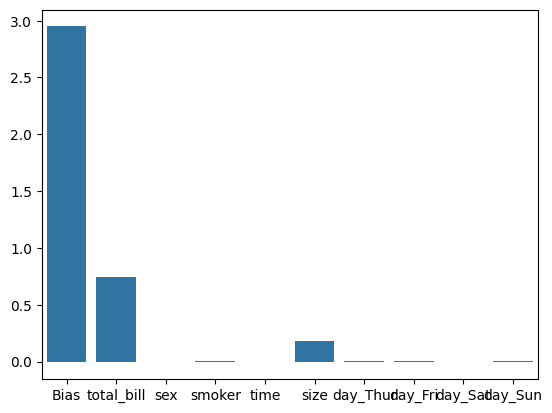

In [27]:
sns.barplot(x=['Bias'] + X_train.columns.tolist(), y=beta_lasso.flatten())

### <a id='toc1_5_'></a>[Visualizing Results](#toc0_)


Let's visualize the predictions of our models against the actual tips.


In [30]:
y_test.shape, y_train.shape

((49,), (195,))

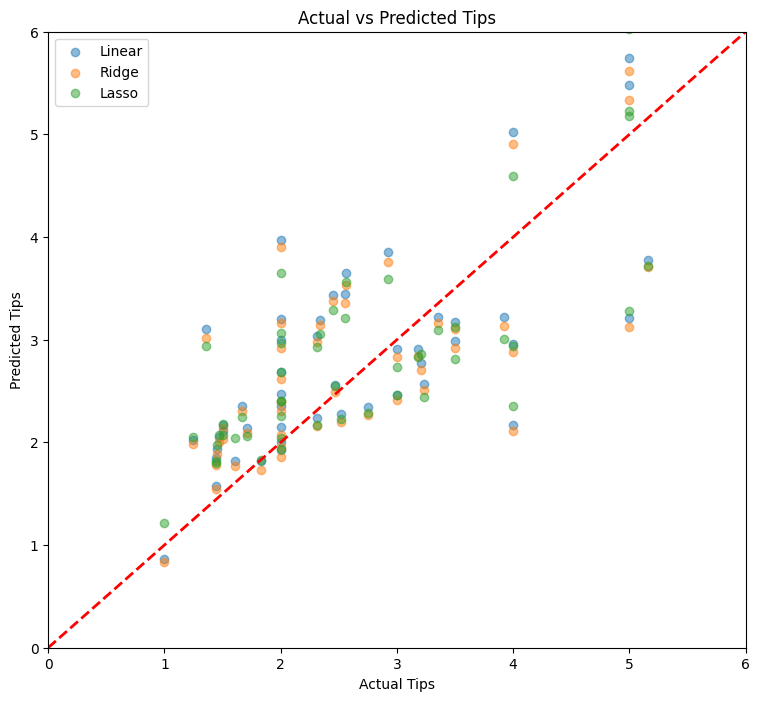

In [40]:
plt.figure(figsize=(9, 8))
plt.scatter(y_test, y_pred_lr, alpha=0.5, label='Linear')
plt.scatter(y_test, y_pred_ridge, alpha=0.5, label='Ridge')
plt.scatter(y_test, y_pred_lasso, alpha=0.5, label='Lasso')
plt.plot([0, 6], [0, 6], 'r--', lw=2)
plt.xlabel('Actual Tips')
plt.ylabel('Predicted Tips')
plt.title('Actual vs Predicted Tips')
plt.legend()
plt.xlim(0, 6)
plt.ylim(0, 6)
plt.show()

### <a id='toc1_6_'></a>[Interpretation and Insights](#toc0_)


After running these models, we can interpret the results:

1. Compare the performance metrics (MSE, RMSE, MAE, R-squared) across models to determine which performs best for this dataset.
2. Analyze the coefficients of the linear and regularized models to understand which features have the most impact on tip amount.
3. Discuss any overfitting or underfitting observed, especially in the polynomial regression model.
4. Consider the practical implications of these results for the restaurant industry.


🔑 **Key Takeaway:** This case study demonstrates how different regression techniques can be applied to a real-world dataset, highlighting the importance of feature engineering, model selection, and evaluation in practical scenarios.


💡 **Pro Tip:** In real-world applications, it's often valuable to consider the interpretability of the model alongside its performance metrics. Sometimes a slightly less accurate but more interpretable model is preferred for business decision-making.


This comprehensive analysis of the Tips dataset showcases the application of various regression techniques we've learned, from basic linear regression to more advanced methods like polynomial and regularized regression. It provides a solid foundation for tackling more complex datasets in the following sections.